In [1]:
import re
import pickle
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from collections import Counter
from collections import defaultdict
from konlpy.tag import Komoran

In [2]:
# minus
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# Data Import

In [3]:
with open('./text/final_text.bin', 'rb') as f:
    final_text= pickle.load(f)

# Preprocessing

In [4]:
def preprocessing(text):
    result= ''
    for ch in text:
        if ch in string.punctuation:
            result += ' '
        else:
            result += ch
    result = ' '.join(result.split())  # '\n'을 제거하기 위해 split() 후 다시 합침
    result= re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',result)
    while '  ' in result:
        result= re.sub('  ',' ', result)
    return result

In [5]:
cleansed_text= preprocessing(final_text)

In [6]:
def return_morph(text):
    import MeCab
    from konlpy.tag import Mecab
    mecab= Mecab(dicpath= 'C:\\mecab\\mecab-ko-dic')
    result= mecab.morphs(text)
    result= [res for res in result if len(res) >= 2 and res not in ['으로','위해','에서','위한','대한','부터','따라','까지','도록','으며','한다','였으며','또한','통해',
                                                                   '관한','된다','으로써']]
    return result

In [7]:
morphs= return_morph(cleansed_text)
top_200= dict(Counter(morphs).most_common(200))

# n-gram

In [8]:
# ngram function
def to_ngrams(morphs, n):
    ngrams= []
    for i in range(0, len(morphs) - n + 1):
        ngrams.append(tuple(morphs[i:i+n]))
    return ngrams

In [9]:
# bigram 예시
to_ngrams(morphs, 2)

[('평균', '수명'),
 ('수명', '상하수도'),
 ('상하수도', '보급'),
 ('보급', '증가'),
 ('증가', '근로'),
 ('근로', '시간'),
 ('시간', '감축'),
 ('감축', '일부'),
 ('일부', '지표'),
 ('지표', '개선'),
 ('개선', '으나'),
 ('으나', '온실가스'),
 ('온실가스', '배출'),
 ('배출', '빈곤'),
 ('빈곤', '인구'),
 ('인구', '비율'),
 ('비율', '증가'),
 ('증가', '산림'),
 ('산림', '갯벌'),
 ('갯벌', '면적'),
 ('면적', '감소'),
 ('감소', '사회'),
 ('사회', '형평'),
 ('형평', '환경'),
 ('환경', '지표'),
 ('지표', '악화'),
 ('악화', '나타났'),
 ('나타났', '기본'),
 ('기본', '계획'),
 ('계획', '이행'),
 ('이행', '과제'),
 ('과제', '전반기'),
 ('전반기', '추진'),
 ('추진', '상황'),
 ('상황', '점검'),
 ('점검', '지속'),
 ('지속', '가능'),
 ('가능', '발전'),
 ('발전', '지표'),
 ('지표', '평가'),
 ('평가', '이루'),
 ('이루', '따르'),
 ('따르', '사회'),
 ('사회', '분야'),
 ('분야', '지표'),
 ('지표', '전반'),
 ('전반', '개선'),
 ('개선', '으나'),
 ('으나', '빈곤'),
 ('빈곤', '인구'),
 ('인구', '비율'),
 ('비율', '여성'),
 ('여성', '경제'),
 ('경제', '활동'),
 ('활동', '참가'),
 ('참가', '사회'),
 ('사회', '복지'),
 ('복지', '지출'),
 ('지출', '선진국'),
 ('선진국', '대비'),
 ('대비', '저조'),
 ('저조', '나타났'),
 ('나타났', '국내'),
 ('국내', '총생산'),
 ('총생산', '인당'),
 ('인당',

In [18]:
cleansed_text

'평균수명 상하수도 보급률 등은 증가하고 근로시간이 감축되는 등 일부 지표가 개선되었으나 온실가스 배출량 빈곤인구비율 등이 증가하고 산림 갯벌 면적이 감소하는 등 사회적 형평성 및 환경지표가 악화된 것으로 나타났다 년에는 제 차 기본계획 의 이행과제 전반기 년 중 년간에 대한 추진 상황 점검과 지속가능발전 지표 평가가 이루어졌다 이에 따르면 사회분야 지표는 전반적으로 개선되고 있으나 빈곤인구비율 여성경제활동 참가율 사회복지지출 등이 선진국 대비 저조한 것으로 나타났다 또한 국내총생산 인당 등 경제성장 관련 지표 개선이 지속되고 있으나 국토 환경자원 훼손 온실가스 배출량 지표 친환경 농업 지표 폐기물 발생 지표 악화 및 에너지 소비 증가가 동반되는 것으로 평가되었다 년에는 제 차 기본계획 의 이행과제에 대한 년도 추진상황 점검과 지속가능발전 지표에 대한 평가를 실시하였다 그 결과 빈곤인구비율 사회복지지출 농어촌 상수도 보급률 기대수명 근로시간 등 사회분야는 전반적으로 개선되고 있는 것으로 나타났으나 실업률 관리직 여성 비율 국민의료비 중 공공재원 비율 공교육비 지출 등의 지표는 단기적으로 악화되고 있는 것으로 나타났다 환경분야의 경우 대비 온실가스 배출량 화학비료 사용량 취수율 자연보호지역비율 등은 개선되고 있으나 인당 온실가스 배출량 광역도시권별 대기오염도 인당 일 물소비량 인당 도시공원 면적 등의 지표는 악화되고 있는 것으로 나타났다 경제분야의 경우 인당 폐기물 재활용율 에너지 원단위 등은 개선되었으며 대비 국가채무 비율 대비 비중 인당 에너지 소비량 폐기물 발생량 등은 악화된 것으로 나타났다 지속가능발전지표 평가결과를 개 회원국과 비교 분석한 결과 사회분야의 경우 소득불평등에 관한 지니계수 노동소득 분배율 실업률 영아사망률 기대수명 비만율 공교육비 지출 고령인구비율은 평균보다 양호한 것으로 나타났다 그러나 빈곤인구 비율 사회복지 지출 고용률 근로시간 남성대비 여성 임금비율 여성경제활동 참가율 자살 사망률 국민의료비 중 공공재원 비율은 평균보다 낮은 상태로 

In [17]:
komoran= Komoran()

words= []
for morph in morphs:
    words.append(komoran.pos(morph))

TypeError: '<' not supported between instances of 'slice' and 'int'

In [ ]:
ngram_counter = defaultdict(int)

for word in words:
    for string, pos in word:
        ngram_counter[string] +=1

In [ ]:
ngram_counter

In [43]:
class NgramTokenizer:

    def __init__(self, ngrams, base_tokenizer, n_range=(1, 3)):
        self.ngrams = ngrams
        self.base_tokenizer = base_tokenizer
        self.n_range = n_range

    def __call__(self, sent):
        return self.tokenize(sent)

    def tokenize(self, sent):
        if not sent:
            return []

        unigrams = self.base_tokenizer.pos(sent, join=True)

        n_begin, n_end = self.n_range
        ngrams = []
        for n in range(n_begin, n_end + 1):
            for ngram in self._to_ngram(unigrams, n):
                ngrams.append('-'.join(ngram))
        return ngrams

    def _to_ngrams(self, words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngram = tuple(words[b:b+n])
            if ngram in self.ngrams:
                ngrams.append(ngram)
        return ngrams

ngram_tokenizer = NgramTokenizer(ngram_counter, komoran)

# WordCloud

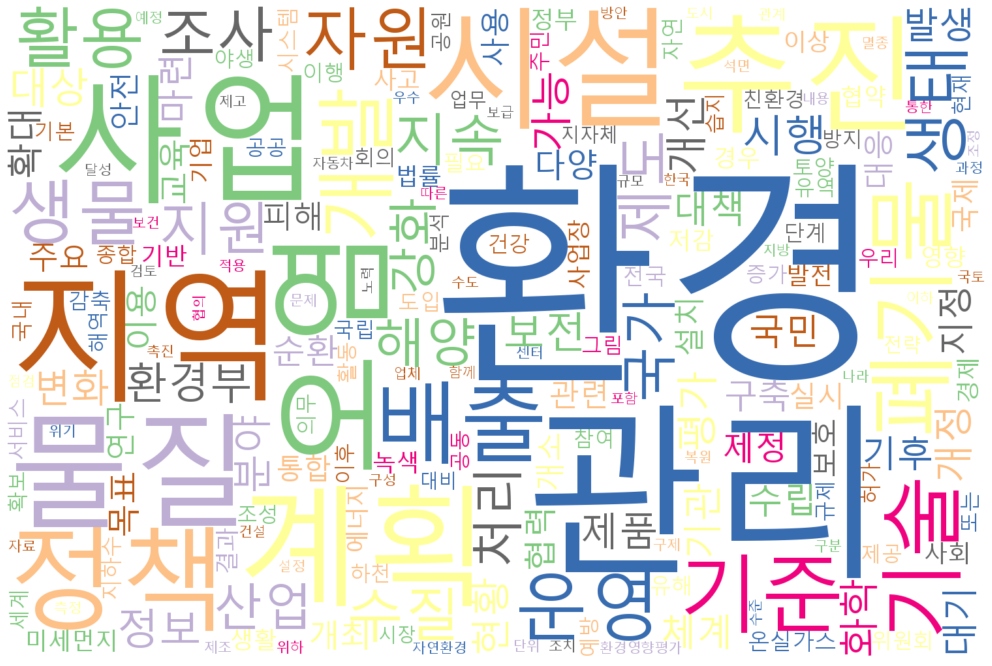

In [16]:
wordcloud= WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(top_200)
fig = plt.figure(figsize= (25,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()